In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.anova import anova_lm
from statsmodels.iolib import summary2
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
import os
import pandas as pd

archivo = 'nu_inpromat.csv'

if os.path.isfile(archivo):
    try:
        # Intenta leer el archivo con encoding 'latin-1'
        df = pd.read_csv(archivo, sep=';', encoding='latin-1')
        print(df)
    except UnicodeDecodeError:
        # Si hay un error de decodificación, intenta leer con encoding 'utf-8'
        df = pd.read_csv(archivo, sep=';', encoding='utf-8')
        print(df)
else:
    print(f"El archivo '{archivo}' no existe en la ruta especificada.")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
#  Objetivo general
#  Realizar análisis predictivo de datos que permita a los directivos tomar decisiones en las estrategias a seguir para la venta de sus productos y compra de materias primas.
#  Objetivos específicos 
#  Realizar un análisis exploratorio de la base de datos y visualización de sus respectivas variables.
#  Realizar segmentación de clientes según la cantidad total monetaria adquirida.
#  Determinar los productos que generan más ingresos y analizar las tendencias de compra relacionadas con esos productos.
#  Realizar un análisis de variación de precios de materia prima respecto al precio del petróleo.
#  Determinar las materias primas mas usados y con mayor valor de adquisición.
#  Realizar un análisis de comparación del consumo de materias primas con los productos más vendidos.


In [22]:
print(df.head(10).to_string(index=False))

 num      fecha   m_ño recibo           cliente                   producto  cantidad precio vent    total
   1 04/01/2021 ene-21    409     JOEL MARTINEZ VENTA DE MAQUINA INYECTORA         1    64000,00 64000,00
   2 04/01/2021 ene-21    410    RONALD BELTRAN         TAPA BOTELLON LONG     10000        0,20  2000,00
   3 04/01/2021 ene-21    411     JULIO MORALES                BOTELLAS 5L       100        4,20   420,00
   4 04/01/2021 ene-21    412            ISMAEL         TAPA BOTELLON LONG      1000        0,22   220,00
   5 04/01/2021 ene-21    412 JHONATAN VILLARES   PRECINTO TERMOCONTRAIBLE         2       47,50    95,00
   6 04/01/2021 ene-21    414     JULIO MORALES                BOTELLAS 1L       600        0,78   468,00
   7 04/01/2021 ene-21    414  JEANDIRA CONDORI              BOTELLAS 1,5L       240        0,96   230,40
   8 04/01/2021 ene-21    414     MILTON MISAEL            BOTELLAS 600 mL       200        0,65   130,00
   9 04/01/2021 ene-21    415     MILTON MISAE

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32380 entries, 0 to 32379
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   num          32380 non-null  int64 
 1   fecha        32380 non-null  object
 2   m_ño         32380 non-null  object
 3   recibo       27863 non-null  object
 4   cliente      32380 non-null  object
 5   producto     32380 non-null  object
 6   cantidad     32380 non-null  int64 
 7   precio vent  32380 non-null  object
 8   total        32380 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.2+ MB


Tenemos 32380 filas y 9 columnas las cuales se encuentran en tipo texto y número entero, se realizara la conversion para trabajar.

In [24]:
# Ejemplo con una cadena que tiene una coma como separador decimal
cadena_con_coma = '0,40'

# Paso 1: Reemplazar la coma por un punto
cadena_con_punto = cadena_con_coma.replace(',', '.')

# Paso 2: Convertir la cadena a un número de punto flotante
numero_float = float(cadena_con_punto)

print(numero_float)

0.4


In [25]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')

In [26]:
# Eliminar la columna 'recibo'
df = df.drop('recibo', axis=1)

In [27]:
df['precio vent'] = df['precio vent'].str.replace(',', '.').astype(float)

In [28]:
df['total'] = df['total'].str.replace(',', '.').astype(float)

In [29]:
df['m_ño'] = df['m_ño'].astype(str)
df['cliente'] = df['cliente'].astype(str)
df['producto'] = df['producto'].astype(str)

HASTA ESTE PUNTO SE CONVIRTIO LA COLUMNA FECHA EN DATA TIME, SE ELIMINO LA COLUMNA RECIBO, SE CONVIRTIO LAS COLUMNAS CANTIDAD,PRECIO VENTA Y TOTAL ENTIPO FLOAT

# Realizar un análisis exploratorio de la base de datos y visualización de sus respectivas variables

In [30]:
df.describe()

,num,fecha,cantidad,precio vent,total
count,32380.000,32380,32380.000,32380.000,32380.000
mean,16190.500,2022-04-09 09:47:31.093267456,848.385,92.534,732.105
min,1.000,2021-01-04 00:00:00,1.000,0.010,0.150
25%,8095.750,2021-12-03 00:00:00,6.000,0.400,33.000
50%,16190.500,2022-04-18 00:00:00,50.000,1.470,115.000
75%,24285.250,2022-08-30 00:00:00,470.000,20.000,363.000
max,32380.000,2022-12-31 00:00:00,220000.000,160080.000,160080.000
std,9347.445,NaN,4152.548,2276.749,3239.085


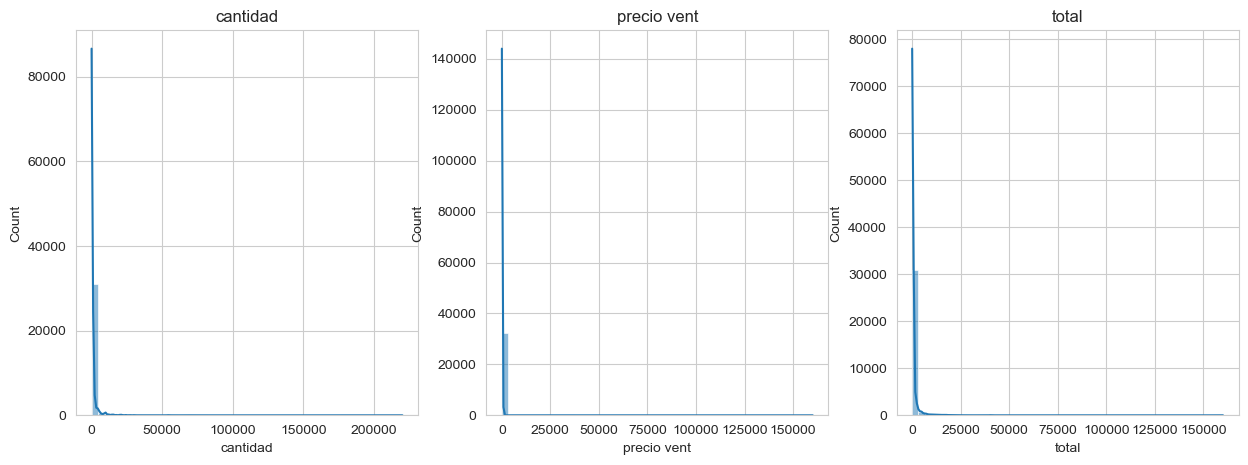

In [31]:
# Dibujar histogramas
col_num = ['cantidad', 'precio vent', 'total']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'año':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)

plt.show()

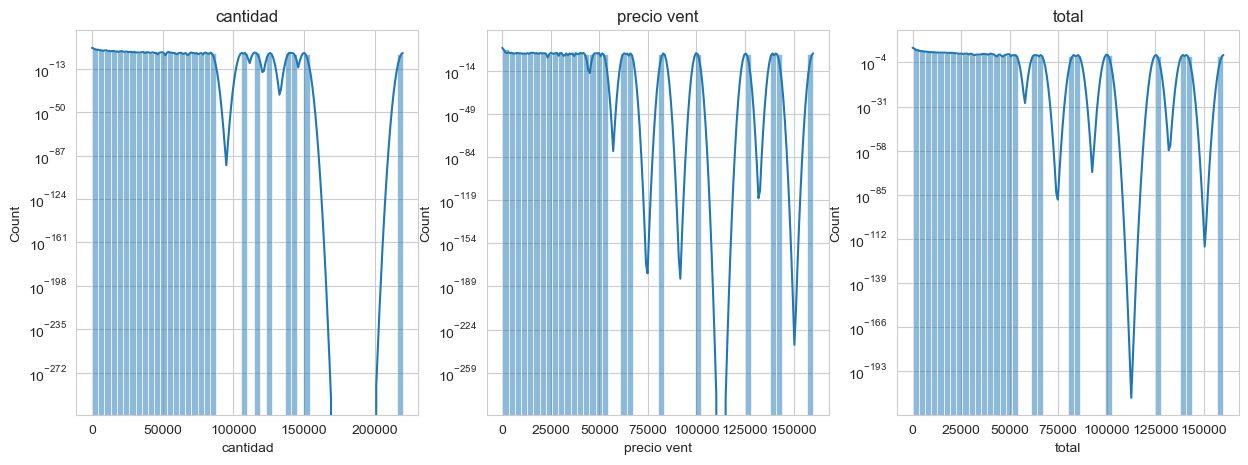

In [32]:
# Dibujar histogramas con escala logarítmica en el eje y
col_num = ['cantidad', 'precio vent', 'total']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'año':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)
    ax[i].set_yscale('log')  # Establecer escala logarítmica en el eje y

plt.show()

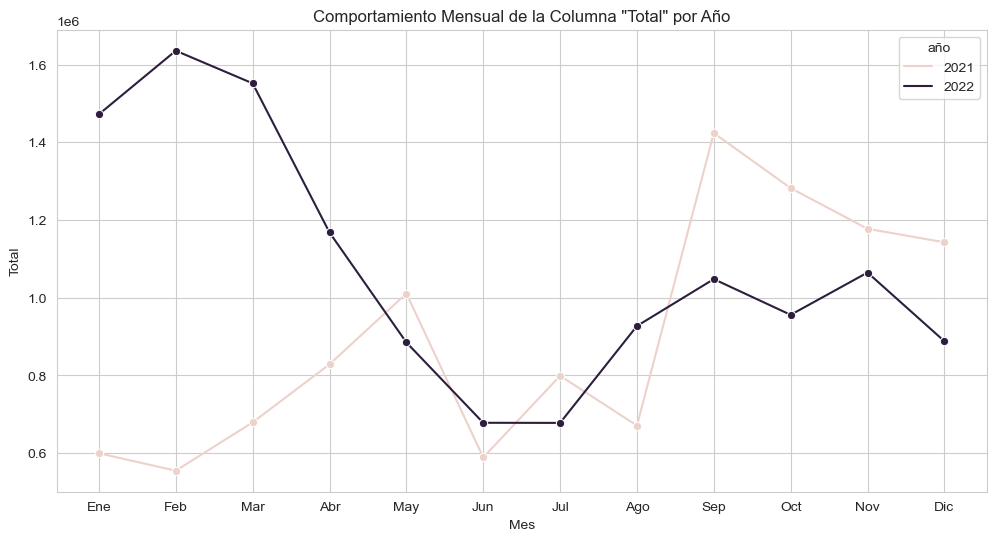

In [33]:
# Agrupar por año y mes y sumar los totales
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df_grouped = df.groupby(['año', 'mes'])['total'].sum().reset_index()

# Crear la gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes', y='total', hue='año', marker='o', data=df_grouped)
plt.title('Comportamiento Mensual de la Columna "Total" por Año')
plt.xlabel('Mes')
plt.ylabel('Total')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

In [37]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame con la columna de fecha como índice y la columna de total
modelo_arima = ARIMA(df['total'], order=(p, d, q))  # Ajusta p, d, q según tu análisis
resultado_arima = modelo_arima.fit
()

# Realizar predicciones en el conjunto de prueba
predicciones = resultado_arima.predict(start='fecha_inicial', end='fecha_final', dynamic=False)

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(df['total'], label='Datos reales')
plt.plot(predicciones, color='red', label='Predicciones')
plt.title('Predicciones de Ingresos con Modelo ARIMA')
plt.legend()
plt.show()

TypeError: '>' not supported between instances of 'range' and 'int'

In [36]:
# Ejemplo incorrecto que genera el error
for i in range(5):
    if i > 3:  # Aquí se produce el error, ya que 'i' es de tipo range
        print(i)

# Corrección: usa la función 'len()' para obtener la longitud del rango
for i in range(5):
    if i > len(range(3)):  # Esto evita el error
        print(i)

4
4


In [ ]:
import itertools
import statsmodels.api as sm

# Supongamos que 'df' es tu DataFrame con la columna de fecha como índice y la columna de total
y = df['total']

# Grid de hiperparámetros p, d, q
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Buscar el mejor conjunto de hiperparámetros usando AIC
mejor_aic = float('inf')
mejor_pdq = None

for params in pdq:
    try:
        modelo_arima = ARIMA(y, order=params)
        resultado_arima = modelo_arima.fit()
        current_aic = resultado_arima.aic

        if current_aic < mejor_aic:
            mejor_aic = current_aic
            mejor_pdq = params

    except:
        continue

# Entrenar el modelo ARIMA con los mejores hiperparámetros
modelo_arima = ARIMA(y, order=mejor_pdq)
resultado_arima = modelo_arima.fit()

# Realizar predicciones en el conjunto de prueba
predicciones = resultado_arima.predict(start='fecha_inicial', end='fecha_final', dynamic=False)

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(y, label='Datos reales')
plt.plot(predicciones, color='red', label='Predicciones')
plt.title('Predicciones de Ingresos con Modelo ARIMA')
plt.legend()
plt.show()

In [ ]:
# Filtrar los datos para febrero de 2022 y septiembre de 2021
febrero_2022 = df[(df['año'] == 2022) & (df['mes'] == 2)]
septiembre_2021 = df[(df['año'] == 2021) & (df['mes'] == 9)]

# Calcular el ingreso total para cada mes
ingreso_total_febrero_2022 = febrero_2022['total'].sum()
ingreso_total_septiembre_2021 = septiembre_2021['total'].sum()

print(f'Ingreso total de febrero de 2022: {ingreso_total_febrero_2022}')
print(f'Ingreso total de septiembre de 2021: {ingreso_total_septiembre_2021}')

In [22]:
# Convertir 'fecha' a formato datetime si aún no está en ese formato
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear una nueva columna 'año' para almacenar el año de cada transacción
df['año'] = df['fecha'].dt.year

# Calcular la cantidad total de ingresos anuales
ingresos_anuales = df.groupby('año')['total'].sum()

# Muestra la cantidad total de ingresos anuales
print(ingresos_anuales)

año
2021   10755628.220
2022   12949933.500
Name: total, dtype: float64


In [23]:
# Calcular la cantidad total de ingresos para todos los años
ingreso_total_global = df['total'].sum()

# Muestra la cantidad total de ingresos para todos los años
print(f"Ingreso total para todos los años: {ingreso_total_global}")

Ingreso total para todos los años: 23705561.720000003


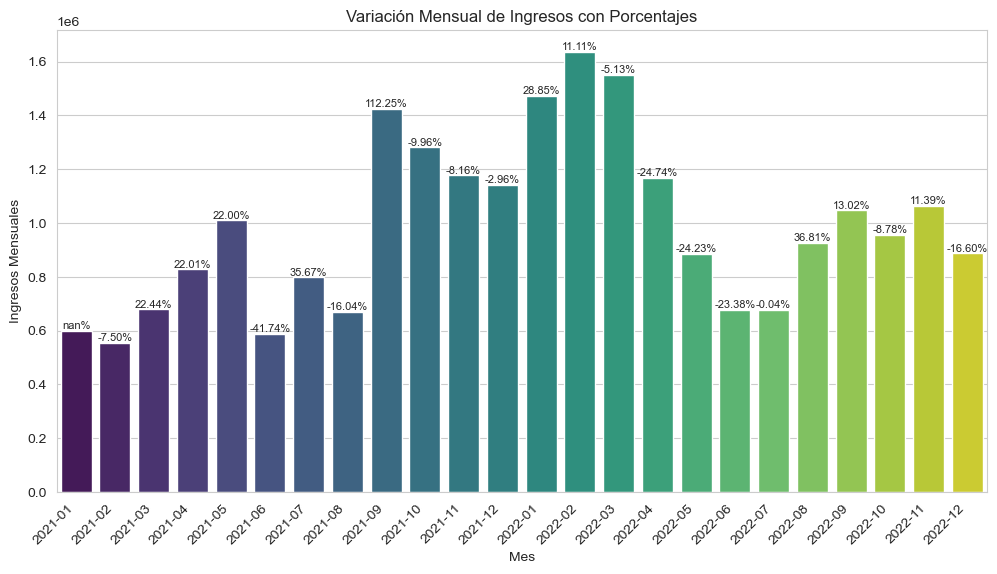

In [24]:
# Convertir la columna 'fecha' a formato datetime si aún no está en ese formato
df['fecha'] = pd.to_datetime(df['fecha'])

# Agrupar por mes y sumar los ingresos
ingresos_mensuales = df.groupby(df['fecha'].dt.to_period("M"))['total'].sum()

# Calcular la variación porcentual mensual
variacion_porcentual = ingresos_mensuales.pct_change() * 100

# Graficar la variación mensual de ingresos
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=ingresos_mensuales.index.astype(str), y=ingresos_mensuales.values, palette='viridis')
plt.title('Variación Mensual de Ingresos con Porcentajes')
plt.xlabel('Mes')
plt.ylabel('Ingresos Mensuales')

# Agregar porcentajes en las barras
for i, value in enumerate(ingresos_mensuales):
    bar_plot.text(i, value, f'{variacion_porcentual[i]:.2f}%', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.show()